In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
x,y = make_circles(n_samples=100,noise=0.05,random_state=42)

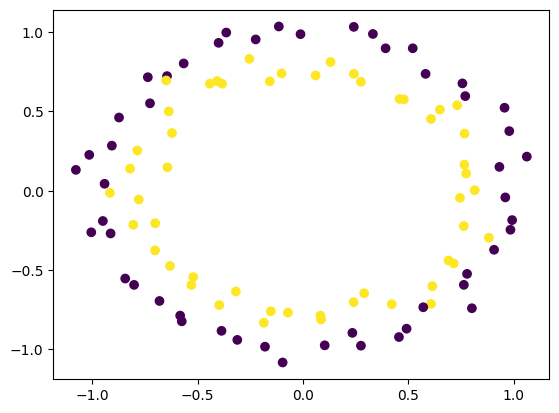

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [8]:
model = Sequential()
x

array([[-0.39684618, -0.72079837],
       [ 0.76762332,  0.35968271],
       [-0.63663424,  0.50008043],
       [ 0.76420024, -0.59338464],
       [ 0.80241569, -0.74074202],
       [ 0.23488158, -0.89596143],
       [-0.90688223,  0.28391018],
       [-0.63087133, -0.47428415],
       [ 0.33240673,  0.98786263],
       [ 0.96101491, -0.04219482],
       [-0.64495068,  0.72223536],
       [-0.80149254, -0.59345631],
       [-0.64319012,  0.14769737],
       [-0.57492919, -0.82313077],
       [ 0.29084885, -0.64648391],
       [ 0.95745271,  0.52294033],
       [-0.7790388 , -0.05543507],
       [-0.80538263, -0.2147602 ],
       [-0.01133069,  0.98658435],
       [-0.68083656, -0.69503173],
       [ 0.60851145,  0.45223929],
       [ 0.08643658, -0.81120961],
       [-0.94961864, -0.19089944],
       [ 0.49231155, -0.86966009],
       [-0.64867244,  0.69482086],
       [-0.36383028,  0.99680073],
       [ 0.27571396, -0.97674589],
       [ 0.71611148, -0.45832879],
       [ 0.39264238,

In [9]:
model.add(Dense(256,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
call = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0000001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)
from mlxtend.plotting import plot_decision_regions
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3500,callbacks=call)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5969 - loss: 0.6865 - val_accuracy: 0.3500 - val_loss: 0.7029
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6500 - loss: 0.6824 - val_accuracy: 0.3500 - val_loss: 0.7044
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6344 - loss: 0.6843 - val_accuracy: 0.3500 - val_loss: 0.7030
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5836 - loss: 0.6865 - val_accuracy: 0.3500 - val_loss: 0.7003
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6211 - loss: 0.6841 - val_accuracy: 0.4000 - val_loss: 0.6997
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6570 - loss: 0.6824 - val_accuracy: 0.4500 - val_loss: 0.6992
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6375 - loss: 0.6840 - val_accuracy: 0.4500 - val_loss: 0.6978
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6328 - loss: 0.6824 - val_accuracy: 0.4500 - v

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 629us/step


<Axes: >

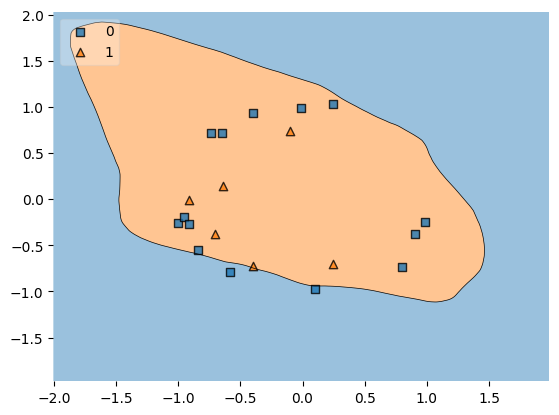

In [17]:
plot_decision_regions(x_test,y_test.ravel(),clf=model,legend=2)

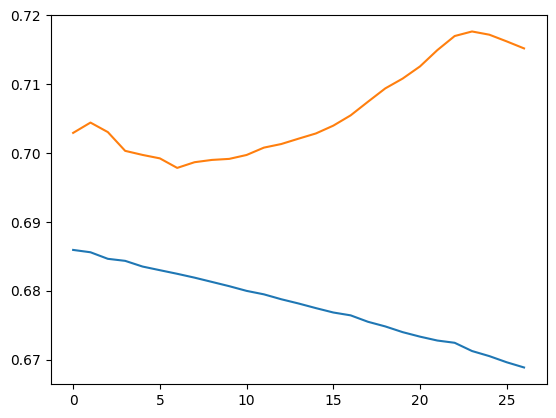

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])